In [3]:
import Bio
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

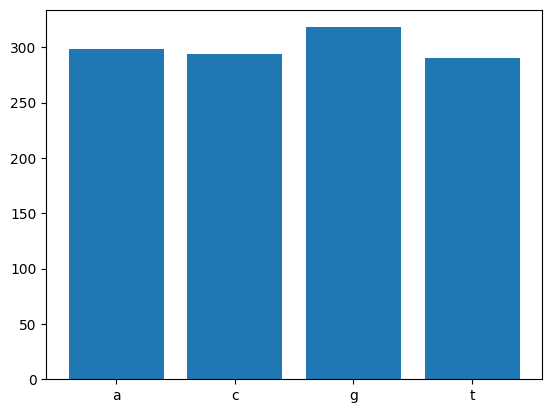

In [9]:
# Number of nucleotides in the sequence
count = 1200

# Generate acgt string randomly
sequence = ''.join(random.choices('acgt', k=count))

# Dictionary of each nucleotide and its count
nucleotide_count = {'a': 0, 'c': 0, 'g': 0, 't': 0}
for nucleotide in sequence:
    nucleotide_count[nucleotide] += 1

# Show plot of nucleotide counts
plt.bar(nucleotide_count.keys(), nucleotide_count.values())

<Axes: >

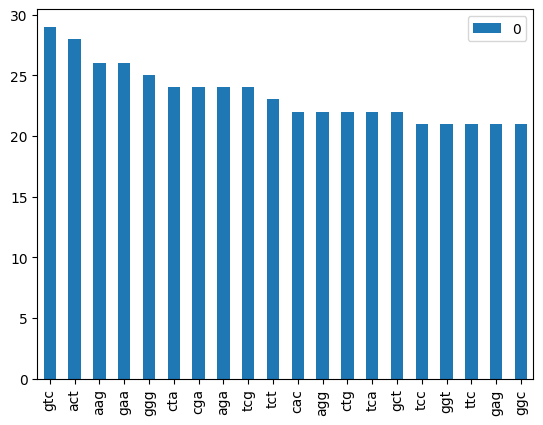

In [13]:
# Create a dictionary of 3-mers and their counts.
kmer_count = {}

for i in range(len(sequence) - 2):
    kmer = sequence[i:i+3]
    if kmer not in kmer_count:
        kmer_count[kmer] = 0
    kmer_count[kmer] += 1

# Create a dataframe from the kmer_count dictionary
df = pd.DataFrame.from_dict(kmer_count, orient='index')

# Order in descending order
df = df.sort_values(by=0, ascending=False)

# Plot the first 20 kmers on a bar chart
df.head(20).plot(kind='bar')

In [16]:
from Bio.Blast import NCBIWWW, NCBIXML
from Bio import SeqIO

def find_species(sequence):
    # Run BLAST
    result_handle = NCBIWWW.qblast("blastn", "nt", sequence)
    
    # Parse the BLAST results
    blast_record = NCBIXML.read(result_handle)
    
    # Get the first hit
    first_hit = blast_record.alignments[0]
    title = first_hit.hit_def
    
    # Extract the species name from the title
    species_name = " ".join(title.split()[1:3])
    
    return species_name

# Your unknown DNA sequence
unknown_sequence = ("TGGGCCTCATATTTATCCTATATACCATGTTCGTATGGTGGCGCGATGTTCTACGTGAATCCACGTTCGAAGGACATCATACCAAAGTCGTACAATTAGGACCTCGATATGGTTTTATTCTGTTTATCGTATCGGAGGTTATGTTCTTTTTTGCTCTTTTTCGGGCTTCTTCTCATTCTTCTTTGGCACCTACGGTAGAG")

species = find_species(unknown_sequence)
print(f"The species is: {species}")
